In [1]:
%run "../head.py"

In [2]:
import cv2
from hic_basic.plot.hic import _plot_mat

In [3]:
batches = ["Sperm", "Sperm_hg", "Tan2018", "mESC"]

IS_files = {
    "Sperm_hg" : h.ddir / "Sperm_hg.d3.proximity_map.20k.IS.tsv",
    "Sperm" : h.ddir / "Sperm.d3.proximity_map.20k.IS.tsv",
    "Tan2018" : h.ddir / "Tan2018.d3.proximity_map.20k.IS.tsv",
    "mESC" : h.ddir / "mESC.d3.proximity_map.20k.IS.tsv"
}
ISs = {
    batch : pd.read_csv(IS_files[batch], sep="\t")
    for batch in batches
}
scAB_3d = {
    "Sperm_hg" : h.ddir / "Sperm_hg.mean_3d_scAB.parquet",
    "Sperm" : h.ddir / "Sperm.mean_3d_scAB.parquet",
}

In [4]:
def view_scAB_from_TADborder(IS, ISwindow, extend, ref_s):
    borders = IS.loc[IS[f"is_boundary_{ISwindow}"]]
    snips = []
    for i, row in borders.iterrows():
        chrom, start = row["chrom"], row["start"]
        if chrom == "chrY":
            continue
        ref = ref_s.loc[(chrom, start-extend):(chrom, start+extend)]
        # drop chrom
        ref = ref.droplevel(0)
        # use relative index
        ref.index = ref.index - start
        snips.append(ref)
    snips = pd.concat(snips, axis=1).T.reset_index(drop=True)
    #kextend = extend // 2 - extend // 2 % 20000
    kextend = extend
    n_snips = snips.div(snips.mean(axis=1), axis=0)
    half_region_sorter = (n_snips.loc[:, -kextend:].median(axis=1) - n_snips.loc[:, 0:kextend].median(axis=1)).sort_values().index
    #data = snips.loc[half_region_sorter]
    #data.index = np.arange(data.shape[0])
    data = n_snips.loc[half_region_sorter]
    data.index = np.arange(data.shape[0])
    return data, borders.reset_index(drop=True).loc[half_region_sorter]

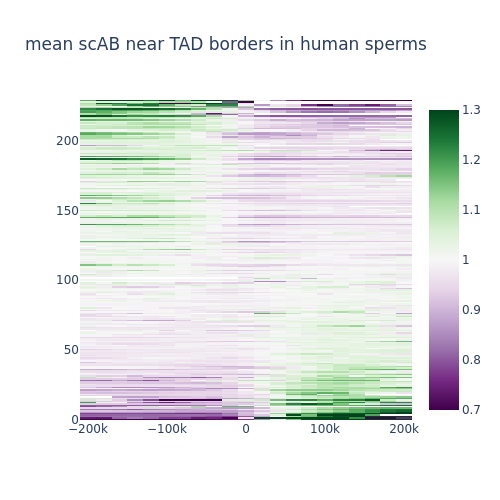

In [5]:
batch = "Sperm_hg"
IS = ISs[batch]
ISwindow = "200000"
extend = 200000
ref_s = pd.read_parquet(scAB_3d[batch]).set_index(["chrom","start"])["scAB"]
data, borders = view_scAB_from_TADborder(IS, ISwindow, extend, ref_s)
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        z=data,
        y=data.index,
        x=data.columns,
        colorscale="prgn",
        zmin=0.7,
        zmax=1.3
    )
)
fig.update_layout(
    height = 500,
    width = 500,
    plot_bgcolor='rgba(0,0,0,0)',
    title = "mean scAB near TAD borders in human sperms",
)
fig.show(renderer="png")

In [8]:
#borders.head(20)

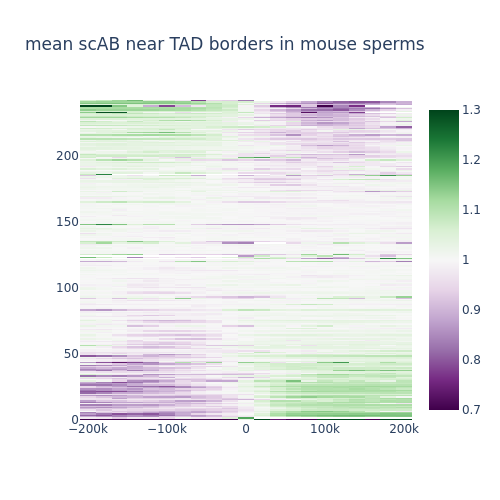

In [9]:
batch = "Sperm"
IS = ISs[batch]
ISwindow = "200000"
extend = 200000
ref_s = pd.read_parquet(scAB_3d[batch]).set_index(["chrom","start"])["scAB"]
data, borders = view_scAB_from_TADborder(IS, ISwindow, extend, ref_s)
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        z=data.values,
        y=data.index,
        x=data.columns,
        colorscale="prgn",
        zmin=0.7,
        zmax=1.3
    )
)
fig.update_layout(
    height = 500,
    width = 500,
    plot_bgcolor='rgba(0,0,0,0)',
    title = "mean scAB near TAD borders in mouse sperms"
)
fig.show(renderer="png")

In [10]:
borders.head(20)

,chrom,start,end,region,is_bad_bin,log2_insulation_score_100000,n_valid_pixels_100000,log2_insulation_score_200000,n_valid_pixels_200000,log2_insulation_score_400000,n_valid_pixels_400000,boundary_strength_100000,boundary_strength_200000,boundary_strength_400000,is_boundary_100000,is_boundary_200000,is_boundary_400000
241,chrX,170500000,170520000,chrX,False,-8.778734,24.0,-9.473776,99.0,-9.877513,399.0,0.552541,0.389947,NaN,True,True,False
232,chrX,124700000,124720000,chrX,False,-10.685625,24.0,-12.331757,99.0,-13.943602,399.0,NaN,12.514468,14.124990,False,True,True
65,chr5,95760000,95780000,chr5,False,-1.816719,24.0,-2.991363,99.0,-3.051613,399.0,0.495672,0.929410,0.169937,True,True,False
51,chr4,122500000,122520000,chr4,False,-1.423077,24.0,-2.546563,99.0,-2.890100,399.0,0.730501,2.762878,3.144937,True,True,True
124,chr10,58160000,58180000,chr10,False,-1.725370,24.0,-3.000000,99.0,-2.003741,399.0,1.826412,3.150209,NaN,True,True,False
17,chr2,100740000,100760000,chr2,False,-1.450771,24.0,-2.352315,99.0,-2.085897,399.0,0.590602,0.788662,NaN,True,True,False
98,chr7,39080000,39100000,chr7,False,-1.882578,24.0,-2.418455,99.0,-1.901151,399.0,NaN,2.531464,NaN,False,True,False
34,chr3,113500000,113520000,chr3,False,-1.427939,24.0,-2.433641,99.0,-1.613546,399.0,NaN,2.667652,NaN,False,True,False
15,chr2,90380000,90400000,chr2,False,-0.663706,24.0,-1.041699,99.0,-0.851740,399.0,NaN,1.105812,NaN,False,True,False
196,chr19,3040000,3060000,chr19,False,-1.884933,24.0,-3.110098,99.0,-4.437871,399.0,0.334876,0.432038,0.310483,True,True,False


In [5]:
def IS2blocks(borders):
    # prepare 0-1, 2-3, 4-5, ...
    chunks = []
    for i, chunk in borders.groupby(lambda x : x % 2):
        chunks.append(chunk)
    chunks[1].index = chunks[1].index - 1
    tad_blocks0 = pd.concat(
        [
            chunks[0][["chrom","start"]],
            chunks[1][["chrom","start"]]
            ],
        axis=1
    )
    tad_blocks0.columns = ["chrom1","start1","chrom2","start2"]
    # prepare 1-2, 3-4, 5-6, ...
    chunks = []
    for i, chunk in borders.groupby(lambda x : x % 2):
        chunks.append(chunk)
    chunks[0].index = chunks[0].index - 1
    tad_blocks1 = pd.concat(
        [
            chunks[1][["chrom","start"]],
            chunks[0][["chrom","start"]]
            ],
        axis=1
    )
    tad_blocks1.columns = ["chrom1","start1","chrom2","start2"]
    tad_blocks = pd.concat([tad_blocks0, tad_blocks1], axis=0).sort_index()
    tad_blocks = tad_blocks.dropna(how="any")
    tad_blocks = tad_blocks.query("chrom1 == chrom2").copy()
    tad_blocks["start1"] = tad_blocks["start1"].astype(int)
    tad_blocks["start2"] = tad_blocks["start2"].astype(int)
    return tad_blocks
# borders = ISs["Tan2018"]
# borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True)
# IS2blocks(borders)

In [5]:
from cooler import Cooler

In [7]:
tads.loc[0]

chrom1       chr1
start1     740000
chrom2       chr1
start2    1960000
Name: 0, dtype: object

In [6]:
from hic_basic.plot.hic import cool2mat

/opt/conda/lib/python3.10/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/opt/conda/lib/python3.10/site-packages/cooltools/api/expected.py:12: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


In [7]:
import cooler

In [26]:
clr = cooler.Cooler(coolp)

In [92]:
#clr = cooler.Cooler("/shareb/ychi/repo/sperm_struct/ds_pipeline/smk2/proximity_map/HuS02_HuSZ147.d3.proximity_map.cool")
clr = cooler.Cooler("/shareb/ychi/repo/sperm_struct/ds_pipeline/smk2/proximity_map/gm12878_01.d3.proximity_map.cool")
#clr = cooler.Cooler("/share/home/ychi/dev/hic_basic/tests/output/simpute/cis_proximity_graph1.cool")

In [93]:
#clr.bins().fetch("chr11")

In [94]:
#from hic_basic.binnify import GenomeIdeograph
#GenomeIdeograph("GRCh38").bins(20000, bed=True,order=True).query('chrom == "chr11"')

In [77]:
def block_pileup(coolp, refs):
    """
    Fetch regions from cooler, iterate chrom by chrom.
    Input:
        coolp: path to cooler file
        refs: list of (chrom, start, end)
    """
    if all((i in tads.columns) for i in ["chrom1","start1","start2"]):
        format = "bedpe"
        chrom_col, start_col, end_col = "chrom1", "start1", "start2"
    elif all((i in tads.columns) for i in ["chrom","start","end"]):
        format =  "bed"
        chrom_col, start_col, end_col = "chrom", "start", "end"
    else:
        raise ValueError("No chrom1/start1/start2 or chrom/start/end found")
    print(f"ref is treated as {format}")
    chroms = tads[chrom_col].unique()
    all_snips = []
    for chrom, tad_chunk in tqdm(tads.groupby(chrom_col), desc="chrom", total=len(chroms)):
        chrom_mat = cool2mat(str(coolp), chrom)
        # NOTE: this is a temporary fix for the bug in cooler
        chrom_mat = chrom_mat.loc[
            ~chrom_mat.index.duplicated(keep="first"),
            ~chrom_mat.columns.duplicated(keep="first")
        ]
        chrom_snips = []
        for i, row in tad_chunk.iterrows():
            start, end = row[start_col], row[end_col]
            length = end - start
            left = start-length if start-length > 0 else 0
            right = end+length if end+length < chrom_mat.index.max() else chrom_mat.index.max()
            snip = chrom_mat.loc[left:right, left:right]
            chrom_snips.append(snip)
    resize_snips = []
    for snip in chrom_snips:
        snip = snip.values
        snip = (snip - np.nanmean(snip)) / np.nanstd(snip)
        resize_snips.append(cv2.resize(snip, (100,100)))
    mat = np.nanmean(np.array(resize_snips), axis=0)
    return mat
# borders = ISs["Tan2018"]
# borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True)
# tads = IS2blocks(borders)
# coolp = h.ddir / "Sperm_hg.d3.proximity_map.mcool"
# coolp = str(coolp)+"::/resolutions/20000"
# tads = tads

In [114]:
border_dfs = [ISs["Tan2018"]] * 2 + [ISs["mESC"]] * 2 + [ISs["Sperm_hg"]]*2 + [ISs["Sperm"]]*2
border_names = ["GM12878"] * 2 + ["mESC"] * 2 + ["Human sperm"]*2 + ["Mouse sperm"]*2
coolps = ["Tan2018.d3.proximity_map.mcool", "Sperm_hg.d3.proximity_map.mcool", "mESC.d3.proximity_map.mcool", "Sperm.d3.proximity_map.mcool"] * 2
coolp_names = ["GM12878", "Human sperm", "mESC", "Mouse sperm"] * 2
for border_df, border_name, coolp, coolp_name in zip(border_dfs, border_names, coolps, coolp_names):
    border_df = border_df.loc[border_df[f"is_boundary_200000"]].reset_index(drop=True)
    tads = IS2blocks(border_df)
    coolp = h.ddir / coolp
    coolp = str(coolp)+"::/resolutions/20000"
    mat = block_pileup(coolp, tads)
    fig = _plot_mat(
        mat,
        donorm=False,
        cmap = "Viridis",
    )
    fig.update_layout(
        height = 500,
        width = 500,
        title = f"{coolp_name} pileup on {border_name} TADs"
    )
    fig.write_image(
        f"pngs/{coolp_name}_on_{border_name}.png"
    )


ref is treated as bedpe


chrom:   0%|          | 0/23 [00:00<?, ?it/s]

chrom: 100%|██████████| 23/23 [00:36<00:00,  1.60s/it]


ref is treated as bedpe


chrom: 100%|██████████| 23/23 [02:04<00:00,  5.42s/it]


ref is treated as bedpe


chrom: 100%|██████████| 20/20 [00:47<00:00,  2.38s/it]


ref is treated as bedpe


chrom: 100%|██████████| 20/20 [01:41<00:00,  5.06s/it]


ref is treated as bedpe


chrom: 100%|██████████| 23/23 [00:36<00:00,  1.60s/it]


ref is treated as bedpe


chrom: 100%|██████████| 23/23 [02:05<00:00,  5.47s/it]


ref is treated as bedpe


chrom: 100%|██████████| 20/20 [00:47<00:00,  2.38s/it]
/tmp/ipykernel_1881/3072007687.py:37: RuntimeWarning:

invalid value encountered in divide



ref is treated as bedpe


chrom: 100%|██████████| 20/20 [01:40<00:00,  5.04s/it]


In [78]:
borders = ISs["Tan2018"]
borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True).query('chrom=="chr1"')
#borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True).query('chrom in ["chr1","chr2","chr3","chr4","chr5","chr6"]')
#borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True)
#chroms = [f"chr{i}" for i in range(1,12)]
#chroms = [f"chr{i}" for i in range(6,13)]
#chroms = [f"chr{i}" for i in range(13,19)]
#borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True).query('chrom in @chroms')
tads = IS2blocks(borders)
#tads = tads.query('(start2 - start1) < 2000000')
coolp = h.ddir / "Tan2018.d3.proximity_map.mcool"
coolp = str(coolp)+"::/resolutions/20000"
tads = tads
mat = block_pileup(coolp, tads)

ref is treated as bedpe


chrom: 100%|██████████| 1/1 [00:20<00:00, 20.52s/it]


In [51]:
fig = px.histogram(
    mat.flatten()
)
fig.update_layout(
    height = 500,
    width = 500,
    title = "histogram of GM12878 pileup on TADs"
)

In [46]:
fig = px.histogram(
    tads["start2"] - tads["start1"]
)
fig.update_layout(
    height = 500,
    width = 500,
    title = "histogram of GM12878 pileup on TADs"
)

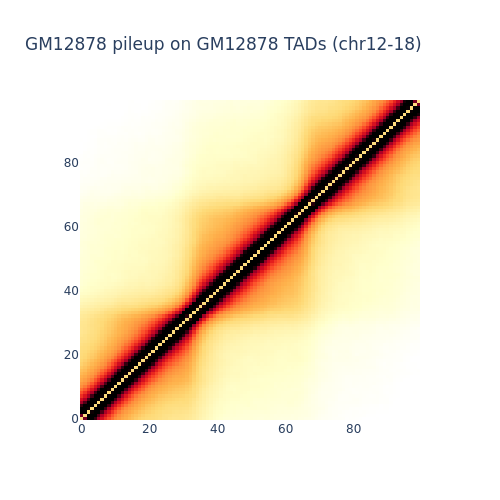

In [80]:
fig = _plot_mat(
    mat,
    donorm=False,
    cmap = "fall",
    zmax = 2,
    zmin = -0.8
    )
fig.update_layout(
    height = 500,
    width = 500,
    title = "GM12878 pileup on GM12878 TADs (chr12-18)"
)
fig.show(renderer="png")

In [103]:
borders = ISs["mESC"]
borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True)
tads = IS2blocks(borders)
coolp = h.ddir / "mESC.d3.proximity_map.mcool"
coolp = str(coolp)+"::/resolutions/20000"
tads = tads
mat = block_pileup(coolp, tads)

ref is treated as bedpe


chrom:   0%|          | 0/20 [00:00<?, ?it/s]

chrom: 100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


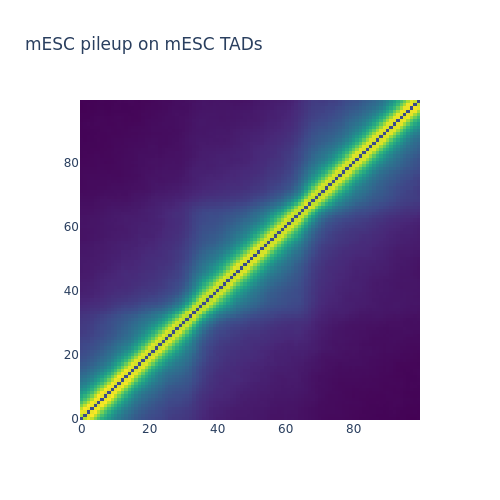

In [105]:
fig = _plot_mat(
    mat,
    donorm=False,
    cmap = "Viridis",
    )
fig.update_layout(
    height = 500,
    width = 500,
    title = "mESC pileup on mESC TADs"
)
fig.show(renderer="png")

In [109]:
borders = ISs["mESC"]
borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True)
tads = IS2blocks(borders)
coolp = h.ddir / "Sperm.d3.proximity_map.mcool"
coolp = str(coolp)+"::/resolutions/20000"
tads = tads
mat = block_pileup(coolp, tads)

ref is treated as bedpe


chrom:   0%|          | 0/20 [00:00<?, ?it/s]

chrom: 100%|██████████| 20/20 [01:42<00:00,  5.12s/it]


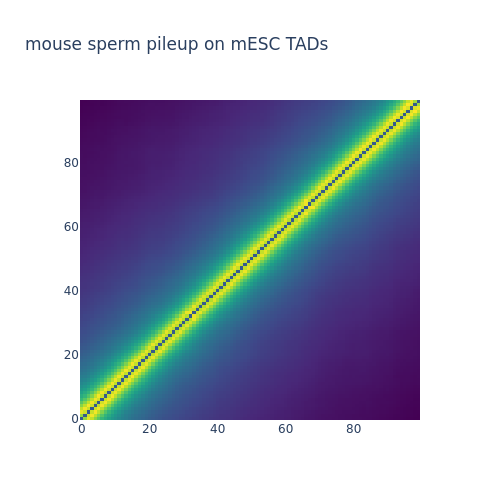

In [110]:
fig = _plot_mat(
    mat,
    donorm=False,
    cmap = "Viridis",
    )
fig.update_layout(
    height = 500,
    width = 500,
    title = "mouse sperm pileup on mESC TADs"
)
fig.show(renderer="png")

In [111]:
borders = ISs["Tan2018"]
borders = borders.loc[borders["is_boundary_200000"]].reset_index(drop=True)
tads = IS2blocks(borders)
coolp = h.ddir / "Sperm_hg.d3.proximity_map.mcool"
coolp = str(coolp)+"::/resolutions/20000"
tads = tads
mat = block_pileup(coolp, tads)

ref is treated as bedpe


chrom:   0%|          | 0/23 [00:00<?, ?it/s]

chrom: 100%|██████████| 23/23 [02:07<00:00,  5.53s/it]


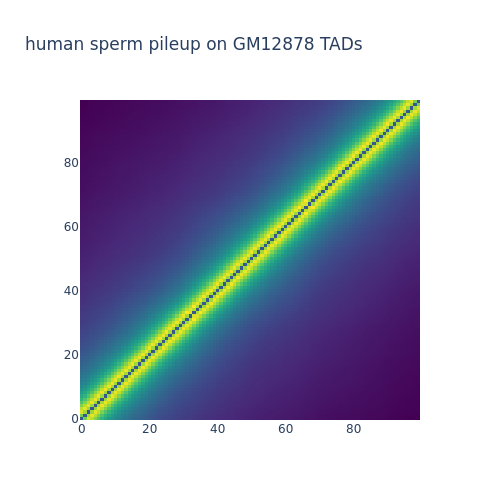

In [112]:
fig = _plot_mat(
    mat,
    donorm=False,
    cmap = "Viridis",
    )
fig.update_layout(
    height = 500,
    width = 500,
    title = "human sperm pileup on GM12878 TADs"
)
fig.show(renderer="png")